<a href="https://colab.research.google.com/github/squinton-gcu/Data-Science/blob/main/Thesis/Modules/Predictive_Analysis_Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predictive Analysis Module
This module creates looks at the top features from the human trauma list and looks into determining a logistic prediction the ALZ dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ALZ_plasma_p = pd.read_csv("/content/drive/MyDrive/Thesis/Processed/ALZ_plasma_processed.csv", index_col=0).transpose()
ALZ_csf_p = pd.read_csv("/content/drive/MyDrive/Thesis/Processed/ALZ_csf_processed.csv", index_col=0).transpose()
trauma_human_p = pd.read_csv("/content/drive/MyDrive/Thesis/Processed/trauma_human_processed.csv", index_col=0).transpose()

sort_stress_top_all_plasma_cor = pd.read_csv("/content/drive/MyDrive/Thesis/Processed/Selected_Features/sort_stress_top_all_plasma_cor.csv", index_col=0)
sort_stress_top_top_plasma_cor =  pd.read_csv("/content/drive/MyDrive/Thesis/Processed/Selected_Features/sort_stress_top_top_plasma_cor.csv", index_col=0)
sort_stress_top_all_csf_cor =  pd.read_csv("/content/drive/MyDrive/Thesis/Processed/Selected_Features/TopStressAllCSF.csv", index_col=0)
sort_stress_top_top_csf_cor =  pd.read_csv("/content/drive/MyDrive/Thesis/Processed/Selected_Features/sort_stress_top_top_csf_cor.csv", index_col=0)

In [ ]:
def get_test_train(dataframe):
  """
  Split data into test train set
  """
  train,test = train_test_split(dataframe, test_size=0.4)
  y_train_headers = train.index
  Y_train_num = []
  for i in y_train_headers:
    if i != None and "AD" in i:
      Y_train_num.append(1)
    else:
      Y_train_num.append(0)

  y_test_headers = test.index
  Y_test_num = []
  for i in y_test_headers:
    if i != None and "AD" in i:
      Y_test_num.append(1)
    else:
      Y_test_num.append(0)
  return train, test, Y_train_num, Y_test_num

In [ ]:
def get_preds(X_train, X_test, Y_train, Y_test, metab):
  """
  This function will create the logistic regression predictive model and
  get the metrics. It will also create a confusion matrix
  """
  train_set = np.array(X_train[metab]).reshape(-1,1)
  test_set = np.array(X_test[metab]).reshape(-1,1)
  LogModel = LogisticRegression().fit(train_set, Y_train)
  y_pred = LogModel.predict(test_set)

  f1_ex = f1_score(Y_test, y_pred)
  accuracy = accuracy_score(Y_test, y_pred)
  prec_ex = precision_score(Y_test, y_pred)
  recall_ex = recall_score(Y_test, y_pred)

  cm = confusion_matrix(Y_test, y_pred)
  matrix_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
  return f1_ex, accuracy, prec_ex, recall_ex, matrix_plot

In [ ]:
plasma_trainX, plasma_testX, plasma_trainY, plasma_testY = get_test_train(ALZ_plasma_p)
csf_trainX, csf_testX, csf_trainY, csf_testY = get_test_train(ALZ_csf_p)


In [ ]:
sort_stress_top_top_plasma_cor.index[0]

'Propionylglycine methyl ester'

In [ ]:
f1, acc, prec, recall, matrix = get_preds(plasma_trainX, plasma_testX, plasma_trainY, plasma_testY, sort_stress_top_all_plasma_cor.index[0])

In [ ]:
sort_stress_top_all_plasma_cor.head()


,pvalues,standard error,RMSE,Spearman Corr
Propionylglycinemethylester,0.065484,0.775096,0.433224,0.342962
2-Methylbutyrylglycine+6.5558777,0.065506,0.354389,0.466580,0.403485
2-Methylbutyrylglycine,0.065693,0.477201,0.520616,0.322788
Dimethylglycine+2.8044205,0.069230,0.816419,0.453713,0.342962
Propionylglycinemethylester+6.2598743,0.072163,0.463442,0.448880,0.383311


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

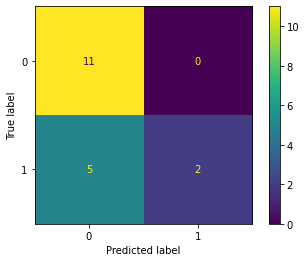

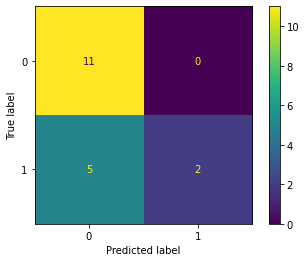

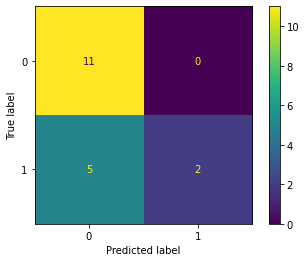

In [ ]:
stress_plasma1 = pd.DataFrame()
matrix_list = []
sample = []
for metabolite in range(len(sort_stress_top_all_plasma_cor)):
  f1, acc, prec, recall, matrix = get_preds(plasma_trainX, plasma_testX, plasma_trainY, plasma_testY, sort_stress_top_all_plasma_cor.index[metabolite])
  metric_list = [f1, acc, prec, recall]
  stress_plasma1[sort_stress_top_all_plasma_cor.index[metabolite]] = metric_list
  matrix_list.append(matrix)
  sample.append(sort_stress_top_all_plasma_cor.index[metabolite])

Matrix_sampleList = pd.DataFrame({"sample": sample, "Matrix": matrix_list})
stress_plasma1.index = ['f1', 'acc', 'prec', 'recall']
stress_plasma1 = stress_plasma1.transpose().sort_values(by=['acc'],ascending=False)

counter=0
while counter < len(stress_plasma1) :
  test = "/content/drive/MyDrive/Thesis/Processed/Selected_Features/Matrix_Plasma_ALL"+ str(counter) +".png"
  Matrix_sampleList[Matrix_sampleList["sample"] == stress_plasma1.index[counter]].iloc[0]["Matrix"].plot()
  plt.savefig(test)
  if counter == 2:
    break
  else:
    counter += 1

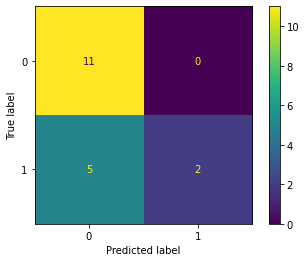

In [ ]:
stress_plasma2 = pd.DataFrame()
matrix_list = []
sample=[]
for metabolite in range(len(sort_stress_top_top_plasma_cor)):
  f1, acc, prec, recall, matrix = get_preds(plasma_trainX, plasma_testX, plasma_trainY, plasma_testY, sort_stress_top_top_plasma_cor.index[metabolite])
  metric_list = [f1, acc, prec, recall]
  stress_plasma2[sort_stress_top_top_plasma_cor.index[metabolite]] = metric_list
  matrix_list.append(matrix)
  sample.append(sort_stress_top_top_plasma_cor.index[metabolite])

Matrix_sampleList = pd.DataFrame({"sample": sample, "Matrix": matrix_list})

stress_plasma2.index = ['f1', 'acc', 'prec', 'recall']
stress_plasma2 = stress_plasma2.transpose().sort_values(by=['acc'],ascending=False)

counter=0
while counter < len(stress_plasma2) :
  test = "/content/drive/MyDrive/Thesis/Processed/Selected_Features/Matrix_Plasma_TOP"+ str(counter) +".png"
  Matrix_sampleList[Matrix_sampleList["sample"] == stress_plasma2.index[counter]].iloc[0]["Matrix"].plot()
  plt.savefig(test)
  if counter == 2:
    break
  else:
    counter += 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

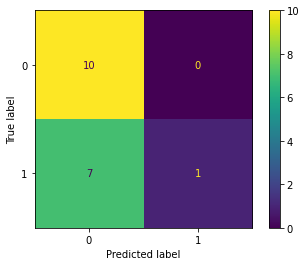

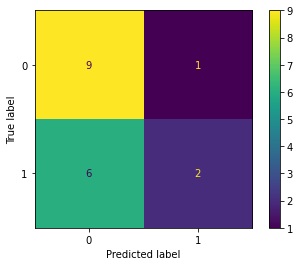

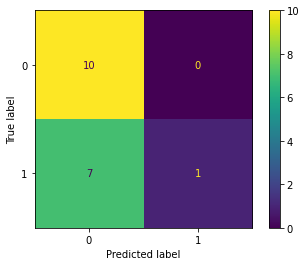

In [ ]:
stress_csf1 = pd.DataFrame()
matrix_list = []
sample=[]
for metabolite in range(len(sort_stress_top_all_csf_cor)):
  f1, acc, prec, recall, matrix = get_preds(csf_trainX, csf_testX, csf_trainY, csf_testY, sort_stress_top_all_csf_cor.index[metabolite])
  metric_list = [f1, acc, prec, recall]
  stress_csf1[sort_stress_top_all_csf_cor.index[metabolite]] = metric_list
  matrix_list.append(matrix)
  sample.append(sort_stress_top_all_csf_cor.index[metabolite])

Matrix_sampleList = pd.DataFrame({"sample": sample, "Matrix": matrix_list})
stress_csf1.index = ['f1', 'acc', 'prec', 'recall']
stress_csf1 = stress_csf1.transpose().sort_values(by=['acc'],ascending=False)

counter=0
while counter < len(stress_csf1) :
  test = "/content/drive/MyDrive/Thesis/Processed/Selected_Features/Matrix_CSF_ALL"+ str(counter) +".png"
  Matrix_sampleList[Matrix_sampleList["sample"] == stress_csf1.index[counter]].iloc[0]["Matrix"].plot()
  plt.savefig(test)
  if counter == 2:
    break
  else:
    counter += 1


In [ ]:
stress_csf2 = pd.DataFrame()
matrix_list = []
for metabolite in range(len(sort_stress_top_top_csf_cor)):
  f1, acc, prec, recall, matrix = get_preds(csf_trainX, csf_testX, csf_trainY, csf_testY, sort_stress_top_top_csf_cor.index[metabolite])
  metric_list = [f1, acc, prec, recall]
  stress_csf2[sort_stress_top_top_csf_cor.index[metabolite]] = metric_list
  matrix_list.append(matrix)

stress_csf2.index = ['f1', 'acc', 'prec', 'recall']
stress_csf2 = stress_csf2.transpose().sort_values(by=['acc'], ascending=False)

counter=0
while counter < len(stress_csf2) :
  test = "/content/drive/MyDrive/Thesis/Processed/Selected_Features/Matrix_CSF_TOP"+ str(counter) +".png"
  Matrix_sampleList[Matrix_sampleList["sample"] == stress_csf2.index[counter]].iloc[0]["Matrix"].plot()
  plt.savefig(test)
  if counter == 2:
    break
  else:
    counter += 1

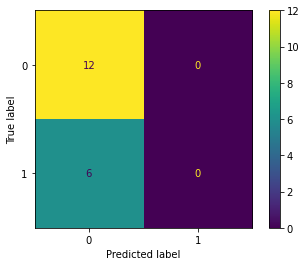

In [ ]:
Matrix_sampleList[Matrix_sampleList["sample"] == stress_csf1.index[22]].iloc[0]["Matrix"].plot()

In [ ]:
stress_plasma1.to_csv("/content/drive/MyDrive/Thesis/Processed/Selected_Features/stress_top_plasma_all_pred.csv")
stress_plasma2.to_csv("/content/drive/MyDrive/Thesis/Processed/Selected_Features/stress_top_plasma_top_pred.csv")
stress_csf1.to_csv("/content/drive/MyDrive/Thesis/Processed/Selected_Features/stress_top_csf_all_pred.csv")
stress_csf2.to_csv("/content/drive/MyDrive/Thesis/Processed/Selected_Features/stress_top_csf_top_pred.csv")

In [ ]:
stress_plasma2

,f1,acc,prec,recall
Propionylglycine methyl ester,0.2,0.555556,0.5,0.125


In [ ]:
matrix_list


## References
Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., Wieser, E., Taylor, J., Berg, S., Smith, N. J., Kern, R., Picus, M., Hoyer, S., van Kerkwijk, M. H., Brett, M., Haldane, A., del Río, J. F., Wiebe, M., Peterson, P., … Oliphant, T. E. (2020). Array programming with NumPy. Nature, 585(7825), 357–362. https://doi.org/10.1038/s41586-020-2649-2

Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90–95. https://doi.org/10.1109/MCSE.2007.55

Joshi, S. (2020, May 1). Save Plots as an Image File Without Displaying in Matplotlib. Delft Stack. https://www.delftstack.com/howto/matplotlib/how-to-save-plots-as-an-image-file-without-displaying-in-matplotlib/

Larose, C., & Larose, D. (2019). Data Science Using Python and R. John Wiley & Sons, Inc.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). 

Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

Reback, J., Jbrockmendel, McKinney, W., Van Den Bossche, J., Augspurger, T., Roeschke, M., Hawkins, S., Cloud, P., Gfyoung, Sinhrks, Hoefler, P., Klein, A., Terji Petersen, Tratner, J., She, C., Ayd, W., Naveh, S., JHM Darbyshire, Garcia, M., … Battiston, P. (2022). pandas-dev/pandas: Pandas 1.4.2 (v1.4.2). Zenodo. https://doi.org/10.5281/ZENODO.3509134

Wu, S. (2021, June 5). What are the best metrics to evaluate your regression model? Medium. https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

